# Class 1 (18-02-2023)

## Конспект

Метрические алгоритмы


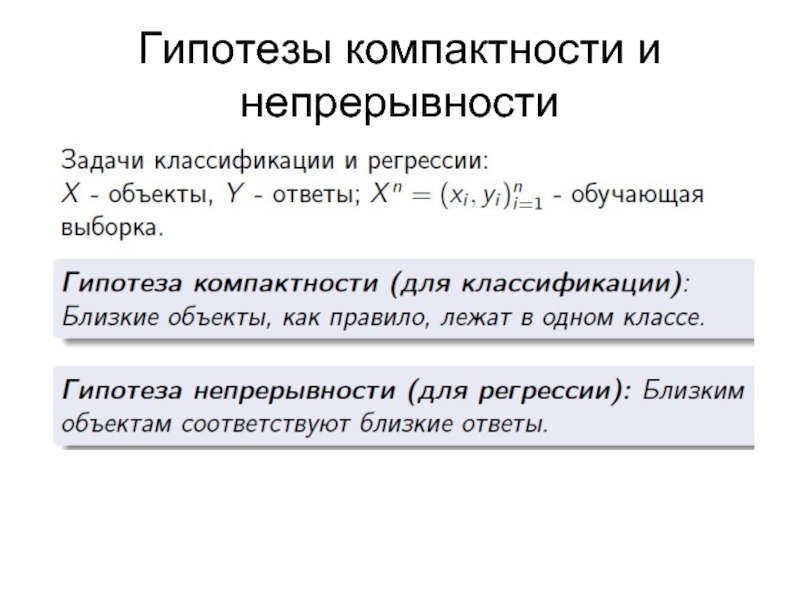

Таксономия алгоритмов ML:

-	В задачах классификации  и регрессии есть тип линейных задач (SVM – метод опорных векторов, (не)линейная класс-ция/регрессия). ![Baselin]
-	Также выделяются метрические (kNN,Hyper-Baisen)
-	Логические (D3’s – Decision Tree’s)
-	Стохастические (naive Bayes, EM-метод)
-	DL
-	[Ансамблевые методы !!!](ttps://habr.com/ru/post/571296/) ( RandomForestClassifier / RandomForestRegressor ; SgBoost)

Таксономия методов обучения:

-	Supervised (с учителем)
-	Unsupervised (без учителя)
-	Semi-supervised (частичное привлечение учителя)
-	Online learning  ( постоянное обучения)
-	Active learning (обучение при взаимодействие с человеком к примеру)

Таксономия обучения представления:


**Метрический алгоритм классификации**



$
a(x;X^l) = arg max \sum^{l}_{i=1} [y^{(i)} = y] w(i,x)
$

где 
- $
[y^{(i)} = y] w(i,x) = Г_{y}(x)
$ - ([нотация Айверса](https://ru.wikipedia.org/wiki/Скобка_Айверсона)) оценка близости объекта x к классу;

- $w(i,x)$ - вес (степень важности) i-го соседа объекта x, неотрицателен, не возрастает по i. 


Пример:

- $w(i,x) = [i \leq 1]$ - метод ближайшего соседа
- $w(i,x) = [i \leq k]$ - метод k ближайших соседей

Преимущества:
- простота реализации (lazy learning)
- параметр k можно оптимизировать по leave-one-out:



$
LOO(k,X^l) = \sum^{l}_{i=1} [a(x_{i}; X^{l} \ x_{i},k) \neq y_{i}] \rightarrow min
$


Недостатки 
- неоднозначность классификации при $Г_{y}(x) = Г_{s}(x) , y \neq s$
- не учитываются значения расстояний

Пример : двумерная выборка, два класса Y= {-1,1}

$
a(x) = arg max Г_{y}(x) = sign(Г_{+1}(x) - Г_{-1}(x)
$


[Полезно](https://github.com/VladislavDuma/SMPR)

[Профиль компкатности](http://www.machinelearning.ru/wiki/index.php?title=Профиль_компактности) - функция доли объектов $x_i$, у которых $m$-й сосед $x_{i}^{(m)}$  лежит в другом классе ($m$ - номер соседей, $X^{l}$ - выборка:

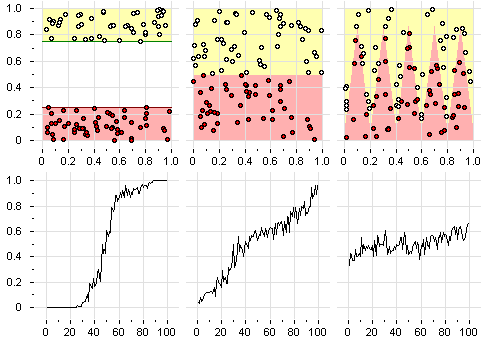

[Метод отбора эталонов!!](http://www.machinelearning.ru/wiki/index.php?title=Алгоритм_СТОЛП)




[Формула Надарая-Ватсона (непараметрическая регрессия)](http://www.machinelearning.ru/wiki/index.php?title=Оценка_Надарая-Ватсона):

$
a_{h}(x;X^l) = \frac{
  \sum^{l}_{i=1} y_{y} w_{i}(x)
}
{
  \sum^{l}_{i=1} w_{i}(x)
} = 
\frac{
  \sum^{l}_{i=1} y_{y} K(\frac{p(x;x_{i})}{h})
}
{
  \sum^{l}_{i=1} K(\frac{p(x;x_{i})}{h})
}
$

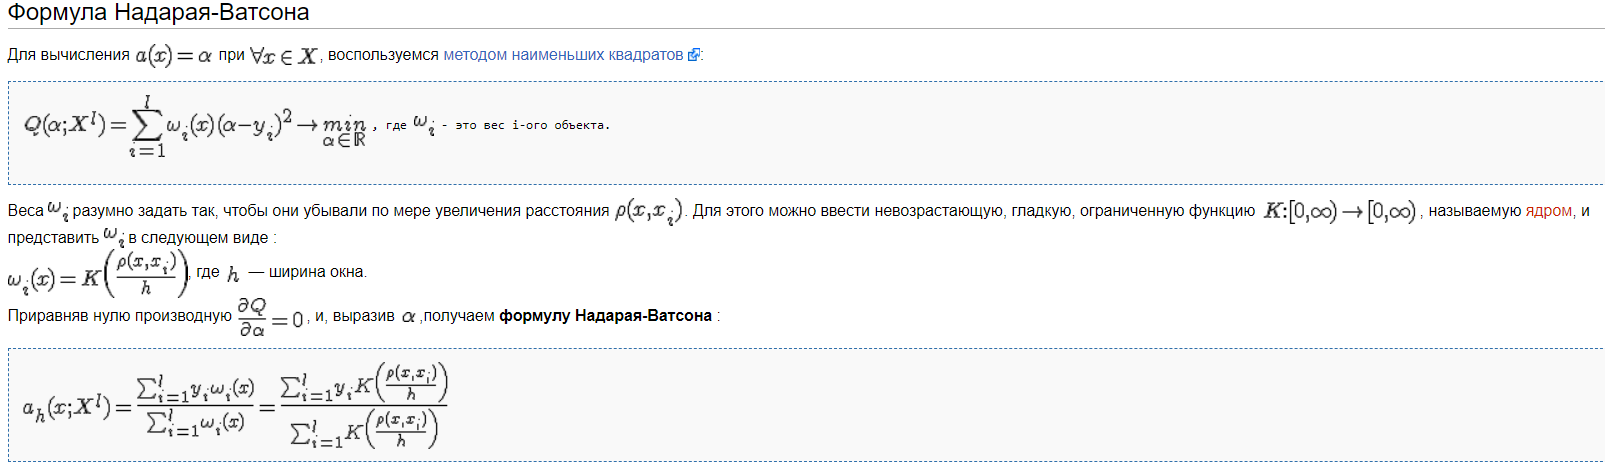

https://habr.com/ru/company/ods/blog/322626/ 

- $K(\frac{p(x;x_{i})}{h})$ ядро
> сущетсвенно влияет на гладкост функции $a_{h}(x)$ и слабо влияет на качество аппроксимации
- Ширина окна h
> существенно влияет на качество аппроксимации
- Переменная ширина кона по k ближайшим соседмя:
> $
w_{i}(x) = K(\frac{p(x;x_{i})}{h(x)}) ; h(x) = \rho(x;x^{i+1})
$


[LOWESS](http://www.machinelearning.ru/wiki/index.php?title=Алгоритм_LOWESS)!!!

## Практика

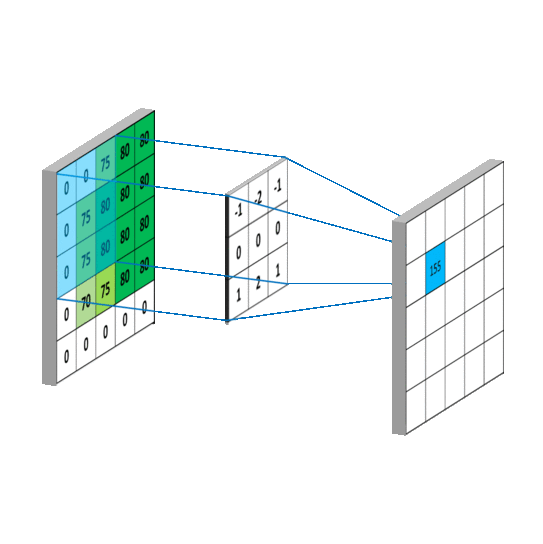

https://translated.turbopages.org/proxy_u/en-ru.ru.a27eee0d-63f0beb5-151c3fa4-74722d776562/https/www.freecodecamp.org/news/creating-your-first-image-classifier/

#

In [ ]:
!git clone  https://github.com/andriygav/MachineLearningSeminars

Cloning into 'MachineLearningSeminars'...
remote: Enumerating objects: 1489, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 1489 (delta 32), reused 24 (delta 11), pack-reused 1441
Receiving objects: 100% (1489/1489), 88.97 MiB | 31.20 MiB/s, done.
Resolving deltas: 100% (715/715), done.


sem 4

In [ ]:
import warnings
warnings.filterwarnings("ignore")

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    !wget -q -O requirements.txt https://raw.githubusercontent.com/andriygav/MachineLearningSeminars/master/sem4/requirements.txt
    !pip3 install -q -U -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 KB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 67.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 39.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 71.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 831.4/831.4 MB 1.9 MB/s eta 

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np
import torch

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions

Датасет

In [ ]:
X, Y = make_classification(n_samples=150, 
                           n_features=2, # количестов признаков
                           n_informative=2, # 
                           n_classes=3, # количество классов
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=50, 
                                                    random_state=0)

Метод ближайшего соседа

In [ ]:
#1NN
model = KNeighborsClassifier(n_neighbors=1)
_ = model.fit(X_train, Y_train)

TypeError: ignored

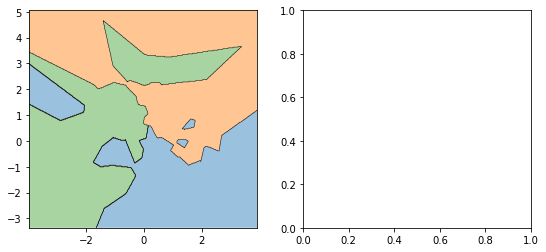

In [ ]:
fig, gs = plt.figure(figsize=(9,4)), gridspec.GridSpec(1, 2)

ax = []
for i in range(2):
    ax.append(fig.add_subplot(gs[i]))


plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])

plt.show()

Метод k-ближайших соседей

In [ ]:
models = []
for n_neighbors in range(1, 50):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, Y_train)
    models.append(model)

In [ ]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))

for i in range(4):
    plot_decision_regions(X_test, Y_test, models[i], ax=ax[i])

plt.show()

In [ ]:
def baseline_model():
    model = Sequential() # последовательная модель
    model.add(BatchNormalization(# Batch Normaliz
        input_shape=input_shape 
        )
    )
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu')) # сверточный слой
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2))) #уменьшен
    model.add(Dropout(0.25))
    
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model

**Полезные ссылки для kNN**
> https://www.kaggle.com/code/kashnitsky/topic-3-decision-trees-and-knn/notebook - knn

> https://github.com/dirty-cat/dirty_cat - векторизация репрезентативно категориальных данных !!!

> https://www.youtube.com/watch?v=_GNaaeEI2tg 

> https://newtechaudit.ru/dirty-cat-dlya-kategorialnyh-peremennyh-ili-pochemu-prostyh-metodov-kodirovaniya-mozhet-byt-nedostatochno/ 

## Homework (Lab1)
Метрические алгоритм:
1. Метод `kNN` , ядерный, с алгоритмо СТОЛП для 5 классов сгенереривонных с помобщью `make_classification` 
2. Для сгенереированного датасет построить профиль компатности
3. Для сген. датасета оптимизация по ширине окна.
4. (*) Метод меняющегося окна
5. (*) Датасет с картинками (небольшой) и найти метод/библиотеку построения имбединга над картинками ([`image-embendings python`](https://github.com/rom1504/image_embeddings)(векторизация)). Приложить этот метод для своих картинок. Применить `kNN` для полученного датасета. 
6. (*) Протестировать на своих картинках

In [ ]:
!pip3 install optuna timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 5.2 MB/s eta 0:00:00


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import keras 

from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical 

from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Dense, Dropout 
from keras.layers import Flatten, BatchNormalization
 
import math
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import optuna

import timm
import os

## HOMEWORK



###1. Метод `kNN` , ядерный, с алгоритмом `СТОЛП` для 5 классов сгенереривонных с помощью make_classification

In [ ]:
X, Y = make_classification(n_samples=1000, 
                           n_features=3, # количестов признаков
                           n_informative=3, # 
                           n_classes=5, # количество классов
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.25, 
                                                    random_state=0)

X_train.shape

(750, 3)

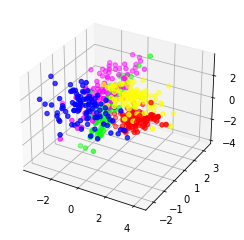

In [ ]:
N = 500
colors = [np.array([1, 0, 0]).reshape(1,-1),np.array([0, 1, 0]).reshape(1,-1),np.array([0, 0, 1]).reshape(1,-1),
np.array([1, 1, 0]).reshape(1,-1),np.array([1, 0, 1]).reshape(1,-1),]
c = [colors[i] for i in Y_train[:N]]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:N,0], X_train[:N,1], X_train[:N,2], c=c)
plt.show()

> Используем GridSearchCV  , чтобы получить лучшие параметры 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'weights':('uniform', 'distance'),
    'n_neighbors':list(map(int,range(5,105,5))),
    'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute'),

    }

clf_knn_pattern = GridSearchCV(KNeighborsClassifier(), parameters)
clf_knn_pattern.fit(X_train,Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                         55, 60, 65, 70, 75, 80, 85, 90, 95,
                                         100],
                         'weights': ('uniform', 'distance')})

 Получаем лучшие параметры 

In [ ]:
clf_knn_pattern.best_params_

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}

In [ ]:
clf_knn_best = KNeighborsClassifier(**clf_knn_pattern.best_params_)

In [ ]:
clf_knn_best.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(
    clf_knn_best,
    X_test,Y_test,
    cv=5,
    scoring = 'recall_macro'
)

array([0.84888889, 0.93555556, 0.94      , 0.94      , 0.85555556])

###2.  Для сгенереированного датасет построить профиль компатности

Нагло своровано [отсюда](https://github.com/andreitsev/stuff/blob/master/space_compactness_profile.py)

In [ ]:
from sklearn.neighbors import NearestNeighbors
# ворованное
def space_compactness_profile(X, y, metric='euclidean'):
    """
    http://www.machinelearning.ru/wiki/index.php?title=Профиль_компактности
    param X: матрица объект-признак, для которой хотим посчитать профиль компактности
    param y: вектор таргетов для этих объектов
    param metric: ['euclidean', 'cosine', ...]
    """
    neigh = NearestNeighbors(n_neighbors=X.shape[0], metric=metric)
    neigh.fit(X, y)
    distances, indexes = neigh.kneighbors(X)
    misclassification_fraction = []
    for neighbour_number in range(1, X.shape[0]):
        misclassification_fraction.append((y != y[indexes[:, neighbour_number]]).mean())
    return np.array(misclassification_fraction)

# использовал во благо свое
def R(j:int,X,y,metric='euclidean'):
  assert 0<=j <= X.shape[0]
  neigh = NearestNeighbors(n_neighbors=X.shape[0], metric=metric)
  neigh.fit(X, y)
  distances, indexes = neigh.kneighbors(X)
  return (y != y[indexes[:, j]]).mean()
RVec = np.vectorize(R)

In [ ]:
# тест
t1 = np.array(list(range(1,X_train.shape[0])))
T1 = np.array(
    [R(i,X_train,Y_train) for i in t1]
    )
import plotly.express as px
fig = px.line(x=t1, y=T1)
fig.show()

###3. Для сген. датасета оптимизация по ширине окна.
###4. (*) Метод меняющегося окна

Метод окна Парзена

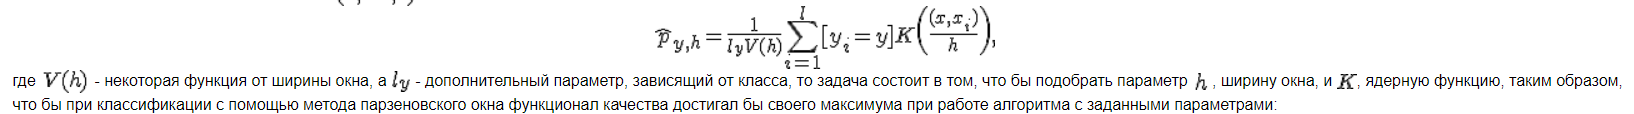

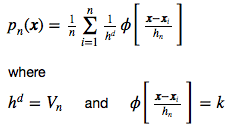

In [ ]:
kernels = {
    'K': lambda distance, h: (1 - (np.array(distance)/h)**2) * (np.abs(np.array(distance)/h) <= 1),
    'E': lambda distance, h: 3/4 * (1 - (np.array(distance)/h)**2) * int(abs(np.array(distance)/h) <=1 ),
    'Q': lambda distance, h: 15/16 * ((1 - (np.array(distance)/h)**2)**2) * int(abs(np.array(distance)/h) <=1),
    'T': lambda distance, h: (1 - abs(np.array(distance)/h)) * int(abs(np.array(distance)/h) <=1),
    'G': lambda distance, h: 1/(2*np.pi)*np.exp(-((np.array(distance)/h)**2)/2),
    'P': lambda distance, h: 1/2 * int(abs(np.array(distance)/h) <=1)
}
def K(distance, h):
  return (1 - (np.array(distance)/h)**2) * (np.abs(np.array(distance)/h) <= 1)
def E(distance, h):
  return 3/4 * (1 - (np.array(distance)/h)**2) * int(abs(np.array(distance)/h) <=1 )
def Q(distance, h):
  return 15/16 * ((1 - (np.array(distance)/h)**2)**2) * int(abs(np.array(distance)/h) <=1)
def T(distance, h):
  return (1 - abs(np.array(distance)/h)) * int(abs(np.array(distance)/h) <=1)
def G(distance, h):
  return 1/(2*np.pi)*np.exp(-((np.array(distance)/h)**2)/2)
def P(distance, h):
  return 1/2 * int(abs(np.array(distance)/h) <=1)

In [ ]:
parameters = {
    'n_neighbors':list(map(int,range(5,105,5))),
    'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute'),

    }
K_knn_pattern = GridSearchCV(KNeighborsClassifier(lambda x: K(x, h=0.5)), parameters)
K_knn_pattern.fit(X_train,Y_train)

E_knn_pattern = GridSearchCV(KNeighborsClassifier(lambda x: E(x,  h=0.5)), parameters)
E_knn_pattern.fit(X_train,Y_train)

Q_knn_pattern = GridSearchCV(KNeighborsClassifier(lambda x: Q(x,  h=0.5)), parameters)
Q_knn_pattern.fit(X_train,Y_train)

T_knn_pattern = GridSearchCV(KNeighborsClassifier(lambda x: T(x,  h=0.5)), parameters)
T_knn_pattern.fit(X_train,Y_train)

G_knn_pattern = GridSearchCV(KNeighborsClassifier(lambda x: G(x,  h=0.5)), parameters)
G_knn_pattern.fit(X_train,Y_train)

P_knn_pattern = GridSearchCV(KNeighborsClassifier(lambda x: P(x,  h=0.5)), parameters)
P_knn_pattern.fit(X_train,Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=<function <lambda> at 0x7f7fd8f8aca0>),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                         55, 60, 65, 70, 75, 80, 85, 90, 95,
                                         100]})

In [ ]:
from sklearn.model_selection import cross_val_score
parzen_patterns = [K_knn_pattern,E_knn_pattern,Q_knn_pattern,T_knn_pattern,G_knn_pattern,P_knn_pattern]
parzens_names = ["K",'E',"Q",'T',"G","T"]
for i in range(len(parzen_patterns)):
  knn_pattern = parzen_patterns[i]
  name_pattern = parzens_names[i]

  clf_knn_best = KNeighborsClassifier(**knn_pattern.best_params_)
  clf_knn_best.fit(X_train,Y_train)
  from sklearn.model_selection import cross_val_score

  print(f"[{name_pattern}]:(score:{cross_val_score(clf_knn_best,X_test,Y_test,cv=5,scoring = 'recall_macro')})")

[K]:(score:[0.84888889 0.95555556 0.96       0.88181818 0.77878788])
[E]:(score:[0.84888889 0.95555556 0.96       0.88181818 0.77878788])
[Q]:(score:[0.84888889 0.95555556 0.96       0.88181818 0.77878788])
[T]:(score:[0.84888889 0.95555556 0.96       0.88181818 0.77878788])
[G]:(score:[0.84888889 0.95555556 0.96       0.88181818 0.77878788])
[T]:(score:[0.84888889 0.95555556 0.96       0.88181818 0.77878788])


In [ ]:
clf_E_best = KNeighborsClassifier(**E_knn_pattern.best_params_)
clf_E_best.fit(X_train,Y_train)
from sklearn.model_selection import cross_val_score

cross_val_score(
    clf_E_best,
    X_test,Y_test,
    cv=5,
    scoring = 'recall_macro'
)

array([0.84888889, 0.95555556, 0.96      , 0.88181818, 0.77878788])

###5. (*) Датасет с картинками (небольшой) и найти метод/библиотеку построения имбединга над картинками ([`image-embendings python`](https://github.com/rom1504/image_embeddings)(векторизация)). Приложить этот метод для своих картинок. Применить `kNN` для полученного датасета. 
###6. (*) Протестировать на своих картинках

In [ ]:
!git clone https://github.com/alexeygrigorev/clothing-dataset.git

Cloning into 'clothing-dataset'...
remote: Enumerating objects: 5792, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 5792 (delta 13), reused 3 (delta 1), pack-reused 5766
Receiving objects: 100% (5792/5792), 152.92 MiB | 31.00 MiB/s, done.
Resolving deltas: 100% (14/14), done.
Updating files: 100% (5759/5759), done.


In [ ]:
IMAGES = "/content/clothing-dataset/images"
CSVSOURCE = "/content/clothing-dataset/images.csv"

#### OLD


PREPARATIONS

<class 'numpy.ndarray'>


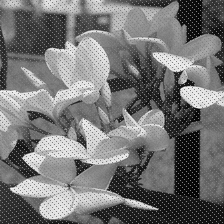

In [ ]:
#solution to converting to 1D vector
#Importing required functionality
import numpy as np
from PIL import Image
import os
import pandas as pd
# read and convert
img = Image.open(f'{FILES}/1.jpg').convert('L')

size = (224,224)
img.thumbnail(size,Image.ANTIALIAS)
arr = np.array(img)

# record the original shape
shape = arr.shape

# make a 1-dimensional view of arr
flat_arr = arr.ravel()
print(type(flat_arr))
# convert it to a matrix
vector = np.matrix(flat_arr)

# do something to the vector
vector[:,::10] = 128

# reform a numpy array of the original shape
arr2 = np.asarray(vector).reshape(shape)

# make a PIL image
img2 = Image.fromarray(arr2, 'L')
img2.show()

In [ ]:
def imageTOarray(
    format:str="jpg",
    pathToImageFolder:str=FILES,
    image_id:str="0",
    size=(50,50),
    colorConvert='L' #colorConvert
    ) -> np.ndarray:
    
    # read and convert
    if image_id is not None:
      if format is not None:
        img = Image.open(f'{pathToImageFolder}/{image_id}.{format}').convert(colorConvert)#convert('colorConvert')
      else:
        img = Image.open(f'{pathToImageFolder}/{image_id}').convert(colorConvert)#convert('colorConvert')
    else:
      if format is not None:
        img = Image.open(f'{pathToImageFolder}.{format}').convert(colorConvert)
      else:
        img = Image.open(f'{pathToImageFolder}').convert(colorConvert)

    arr_1 = np.array(img)
    # record the original shape
    shape = arr_1.shape
    # size = (int(shape[0] * scale),int(shape[1] * scale))
    img.thumbnail(size,Image.ANTIALIAS)
    arr = np.array(img)
    shape = arr.shape
    # make a 1-dimensional view of arr
    flat_arr = arr.ravel()
    return flat_arr,shape

def arraySHOWimage(
    flat_arr:np.ndarray,
    shape:tuple):
    # convert it to a matrix
    vector = np.matrix(flat_arr)
    # reform a numpy array of the original shape
    arr2 = np.asarray(vector).reshape(shape)

    # make a PIL image
    img2 = Image.fromarray(arr2, 'L')
    img2.show()

In [ ]:
flatt_array,shape = imageTOarray(image_id="25")
shape

(50, 50)

In [ ]:
with open(FLOWERS_LABELS,'r') as f:
  flowers = f.readlines()
  catefories = [i + 1 for i in range(len(flowers))]
for fl in flowers:
  fl = fl.rstrip("\n") 
dictFlowers = dict(zip(catefories,flowers))

In [ ]:
filesList = os.listdir(FILES)
list_arr_files = []
t = 0
STOP = 750
for F in filesList:
    if t == STOP:
      break
    t= t + 1
    image_id,format = F.split('.')
    flatt_array,_ = imageTOarray(format=format,image_id=image_id,pathToImageFolder=FILES)
    list_arr_files.append(flatt_array[np.newaxis,:])
flowers_array = np.concatenate(list_arr_files,axis=0)
flowers_array.shape

(750, 2500)

In [ ]:
Cols = [f"x_{i}" for i in range(flowers_array.shape[1])]


X_df = pd.DataFrame(data=flowers_array,columns=Cols)
X_df

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_2490,x_2491,x_2492,x_2493,x_2494,x_2495,x_2496,x_2497,x_2498,x_2499
0,92,93,94,105,59,40,48,49,51,23,...,35,44,51,35,40,66,20,25,91,100
1,10,20,29,19,12,12,20,28,17,37,...,90,80,79,70,21,13,19,16,18,18
2,24,24,23,23,22,20,20,26,35,43,...,51,29,31,27,23,24,24,24,22,19
3,43,44,74,158,232,255,246,243,206,144,...,153,171,171,159,170,164,167,169,157,151
4,81,79,79,68,31,23,32,28,48,59,...,164,152,141,143,94,95,164,172,171,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,121,123,124,127,126,128,130,120,121,156,...,28,44,39,48,91,124,108,109,109,103
746,112,114,152,201,127,119,117,119,121,117,...,175,177,184,195,209,222,228,229,230,232
747,101,94,81,97,153,138,88,151,85,37,...,87,90,54,118,148,212,192,107,182,228
748,30,32,38,41,36,30,24,45,92,92,...,90,100,88,79,79,79,62,74,80,70


In [ ]:
Y_df = pd.read_csv(LABELS)

Y_df = Y_df.drop('image_id', axis=1)
Y_df = Y_df.head(int(STOP))
Y_df

,category
0,77
1,81
2,52
3,72
4,58
...,...
745,52
746,58
747,9
748,77


In [ ]:
X  = flowers_array
Y = Y_df.values.ravel()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.25, 
                                                    random_state=0)



In [ ]:
parameters = {
    'weights':('uniform', 'distance'),
    'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,15],
    'algorithm':('ball_tree', 'kd_tree'),
    }

clf_knn_pattern = GridSearchCV(KNeighborsClassifier(), parameters)
clf_knn_pattern.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('ball_tree', 'kd_tree'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 15],
                         'weights': ('uniform', 'distance')})

In [ ]:
clf_knn_pattern.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 12, 'weights': 'distance'}

In [ ]:
clf_knn_best = KNeighborsClassifier(**clf_knn_pattern.best_params_)

In [ ]:
clf_knn_best.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=12, weights='distance')

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(
    clf_knn_best,
    X_test,Y_test,
    cv=2,
    scoring = 'recall_macro'
)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.01909722, 0.00892857])

DOWNLOAD IMAGE

In [ ]:
# from PIL import Image
import requests
import shutil

label = "Bishop of llandaff"
url = 'https://www.kernock.co.uk/acatalog/DAHBOL.jpg '

FILE = '/content/DAHBOL.jpg'
response = requests.get(url, stream=True)
with open(FILE, 'wb') as out_file:
    shutil.copyfileobj(response.raw, out_file)
del response

In [ ]:
X_pred, _ = imageTOarray(format=None,pathToImageFolder=FILE,image_id=None)
X_pred.shape

(2500,)

In [ ]:
Y_pred=clf_knn_best.predict(X_pred.reshape(1, -1))
dictFlowers[Y_pred[0]]

'Japanese Anemone\n'

#### NEW


In [ ]:
!pip3 install img2vec_pytorch
!pip3 install Pillow
!pip3 install scikit-learn

In [ ]:
import tensorflow_datasets as tfds
from img2vec_pytorch import Img2Vec
from PIL import Image
import torch

####*Roboflow*

In [ ]:
!pip3 install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="UPajFxKrgOj7FGpbDk9j")
project = rf.workspace("jacob-solawetz").project("flowers_classification")
dataset = project.version(3).download("folder")

####*Fashion MNIST*

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.11.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

#### Code

In [ ]:
from img2vec_pytorch import Img2Vec
from PIL import Image
import torch
import pandas as pd

def imgToVec(pathToFolder:str=f"{IMAGES}",cudaIsavailable=False,image="00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg"):
  file = f"{pathToFolder}/{image}"
  # Initialize Img2Vec with GPU
  img2vec = Img2Vec(cuda=cudaIsavailable) #if torch.cuda.is_available() else Img2Vec(cuda=False)
  # Read in an image (rgb format)
  img = Image.open(f"{file}")
  # Get a vector from img2vec, returned as a torch FloatTensor
  vec = img2vec.get_vec(img, tensor=True)

  return vec.numpy().ravel()

In [ ]:
labelsDF = pd.read_csv(CSVSOURCE)
labelsDF.head()

,image,sender_id,label,kids
0,4285fab0-751a-4b74-8e9b-43af05deee22,124,Not sure,False
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,148,T-Shirt,False
2,00627a3f-0477-401c-95eb-92642cbe078d,94,Not sure,False
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,43,T-Shirt,False
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,189,Shoes,False


In [ ]:
import os
listOfImg = []
listOfLabel = []
t = 1000#np.inf
for name in os.listdir(IMAGES):
  if t ==0:
    break
  t -=1
  try:
    image_name = name.split(sep='.')[0]
    label = labelsDF.loc[labelsDF['image'] == image_name, 'label'].values[0]

    listOfLabel.append(label)
    listOfImg.append(imgToVec(cudaIsavailable=torch.cuda.is_available(),image=name))
  except IndexError:
        print("Oops!  That was no valid number.  Try again...")
X = np.array(listOfImg)
Y = np.array(listOfLabel)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.25, 
                                                    random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'weights':('uniform', 'distance'),
    'n_neighbors':list(map(int,range(5,105,5))),
    'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute'),

    }

clf_knn_pattern = GridSearchCV(KNeighborsClassifier(), parameters)
clf_knn_pattern.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                         55, 60, 65, 70, 75, 80, 85, 90, 95,
                                         100],
                         'weights': ('uniform', 'distance')})

In [ ]:
clf_knn_best = KNeighborsClassifier(**clf_knn_pattern.best_params_)
clf_knn_best.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

Загружаем фотография

In [ ]:
!mkdir download_images
DOWNLOAD = "/content/download_images"

In [ ]:
!cd {DOWNLOAD}
from google.colab import files
files.upload()
!cd /content

0 - 71ff7feb-46d2-47b1-8b0c-a5e4b71b9869.jpg


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


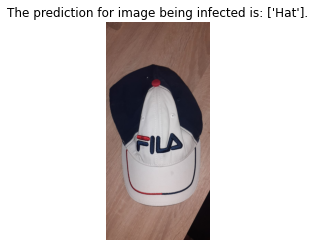

In [ ]:
# importing required libraries

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# while True:
#   for i in range(len(os.listdir(DOWNLOAD))):
#     print(f'{i} - {os.listdir(DOWNLOAD)[i]}')
#   choice = int(input("Your choice: "))
#   if 0 <= choice <= len(os.listdir(DOWNLOAD)) - 1:
#     file  = os.listdir(DOWNLOAD)[choice]
#     input = imgToVec(pathToFolder=DOWNLOAD,image=file)
#     output = clf_knn_best.predict(input)
for i in range(len(os.listdir(DOWNLOAD))):
    print(f'{i} - {os.listdir(DOWNLOAD)[i]}')

choice = 0#int(input("Your choice: "))
if 0 <= choice <= len(os.listdir(DOWNLOAD)) - 1:
  file  = os.listdir(DOWNLOAD)[choice]
  input = imgToVec(pathToFolder=DOWNLOAD,image=file)
  output = clf_knn_best.predict(input.reshape(1,-1))

  plt.imshow(mpimg.imread(f"{DOWNLOAD}/{file}"))
  plt.title(f"The prediction for image being infected is: {output}.")
  plt.axis("off")